In [42]:
from Classes.KNumNeighborsClassifier import KNumNeighborsClassifier
from Classes.KNumNeighborsTeacher import KNumNeighborsTeacher
from Classes.KMeanClastinatorTrain import KMeanClastinatorTrain
from Functions.functions_of_priority import max_count_class
import numpy as np
import pandas as pd
from random import choice
from Functions.distance_functions import euclid_distance
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.metrics import classification_report, confusion_matrix


In [43]:
def random_center(x, k): 
    return np.array([choice(x) for _ in range(k)])
def standart_mass_center_searcher(a): 
    return sum(a)/a.shape[0]


In [44]:
data1 = pd.read_csv('../Data/DataLaba6/data1.csv')
x1 = (data1.drop('class', axis=1)).to_numpy()
y1 = data1['class'].to_numpy()


In [45]:
st1 = random_center(x1, 3)
st1

array([[4.99723054, 0.25121796],
       [5.1949933 , 2.42753135],
       [7.48936154, 7.39192009]])

In [46]:
cl = KMeanClastinatorTrain(centers_of_mass=st1,
                           k_neighbors=5, 
                           metric=euclid_distance, 
                           mass_center_searcher=standart_mass_center_searcher,
                           function_of_priority=max_count_class,
                           n_steps=10)
clastinator1 = cl.train(x1)


In [47]:
st1

array([[4.99723054, 0.25121796],
       [5.1949933 , 2.42753135],
       [7.48936154, 7.39192009]])

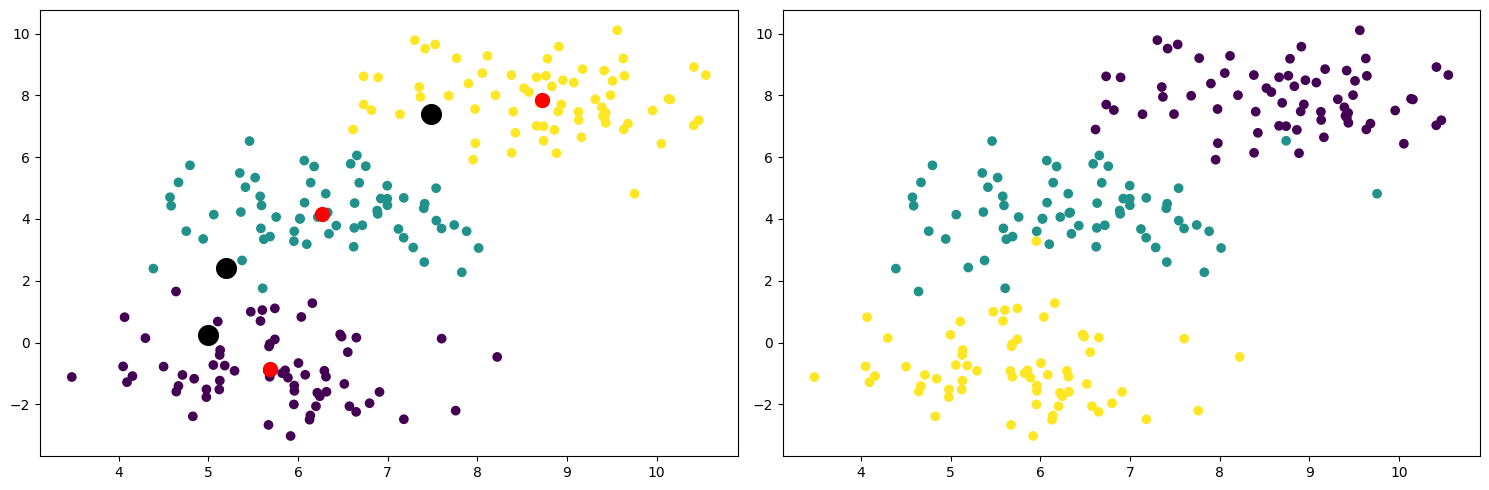

In [48]:
fig = plt.figure(tight_layout=True)
fig.set_figheight(5)
fig.set_figwidth(15)
gs = gridspec.GridSpec(1, 2)
ax = fig.add_subplot(gs[0, 0])
ax.scatter(x1[:, 0], x1[:, 1], c=clastinator1.predict(x1))
ax.scatter(st1[:, 0],
           st1[:, 1], s=200, c='black')
ax.scatter(clastinator1.X_train[:, 0],
           clastinator1.X_train[:, 1], s=100, c='red')

ax = fig.add_subplot(gs[0, 1])
ax.scatter(x1[:,0], x1[:,1], c=y1)


# Data 2

In [49]:
data2 = pd.read_csv('../Data/DataLaba6/data2.csv')
x2 = (data2.drop('class', axis=1)).to_numpy()
y2 = data2['class'].to_numpy()


In [50]:
st2 = random_center(x2, 5)


In [51]:
cl2 = KMeanClastinatorTrain(centers_of_mass=st2,
                            k_neighbors=10,
                            metric=euclid_distance,
                            mass_center_searcher=standart_mass_center_searcher,
                            function_of_priority=max_count_class,
                            n_steps=100)
clastinator2 = cl2.train(x2)



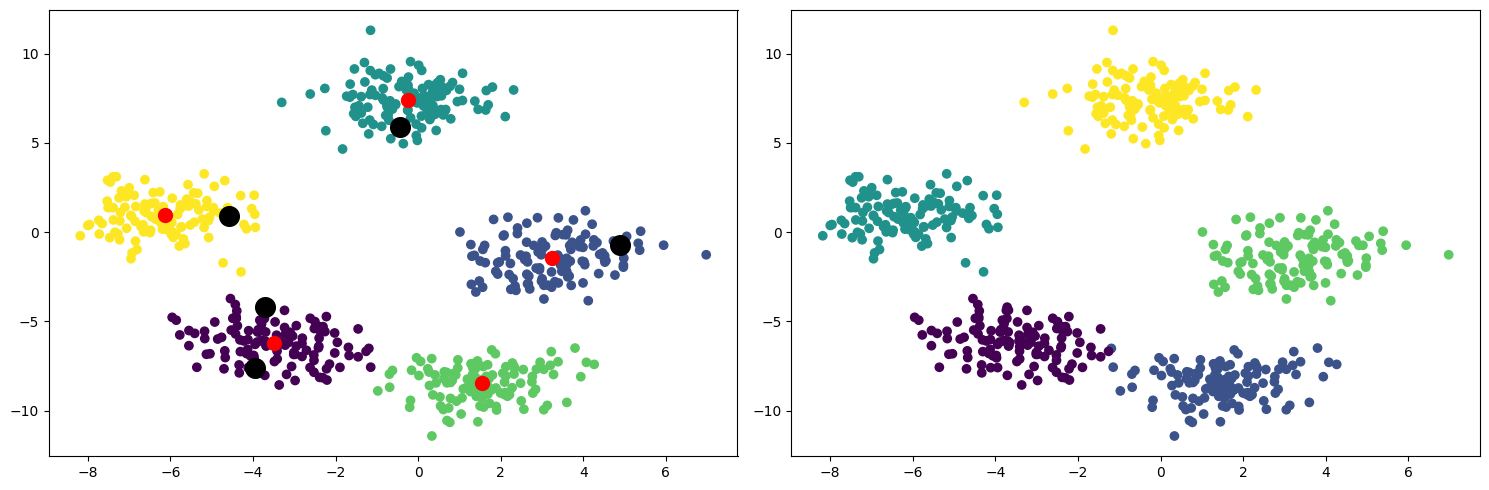

In [52]:
fig = plt.figure(tight_layout=True)
fig.set_figheight(5)
fig.set_figwidth(15)
gs = gridspec.GridSpec(1, 2)
ax = fig.add_subplot(gs[0, 0])
ax.scatter(x2[:, 0], x2[:, 1], c=clastinator2.predict(x2))
ax.scatter(st2[:, 0],
           st2[:, 1], s=200, c='black')
ax.scatter(clastinator2.X_train[:, 0],
           clastinator2.X_train[:, 1], s=100, c='red')
ax = fig.add_subplot(gs[0, 1])
ax.scatter(x2[:,0], x2[:,1], c=y2)

# Data 3

In [59]:
data3 = pd.read_csv('../Data/DataLaba6/data3.csv')
x3 = (data3.drop('class', axis=1)).to_numpy()
y3 = data3['class'].to_numpy()


In [60]:
st3 = random_center(x3, 10)


In [61]:
cl3 = KMeanClastinatorTrain(centers_of_mass=st3,
                            k_neighbors=5,
                            metric=euclid_distance,
                            mass_center_searcher=standart_mass_center_searcher,
                            function_of_priority=max_count_class,
                            n_steps=200)
clastinator3 = cl3.train(x3)



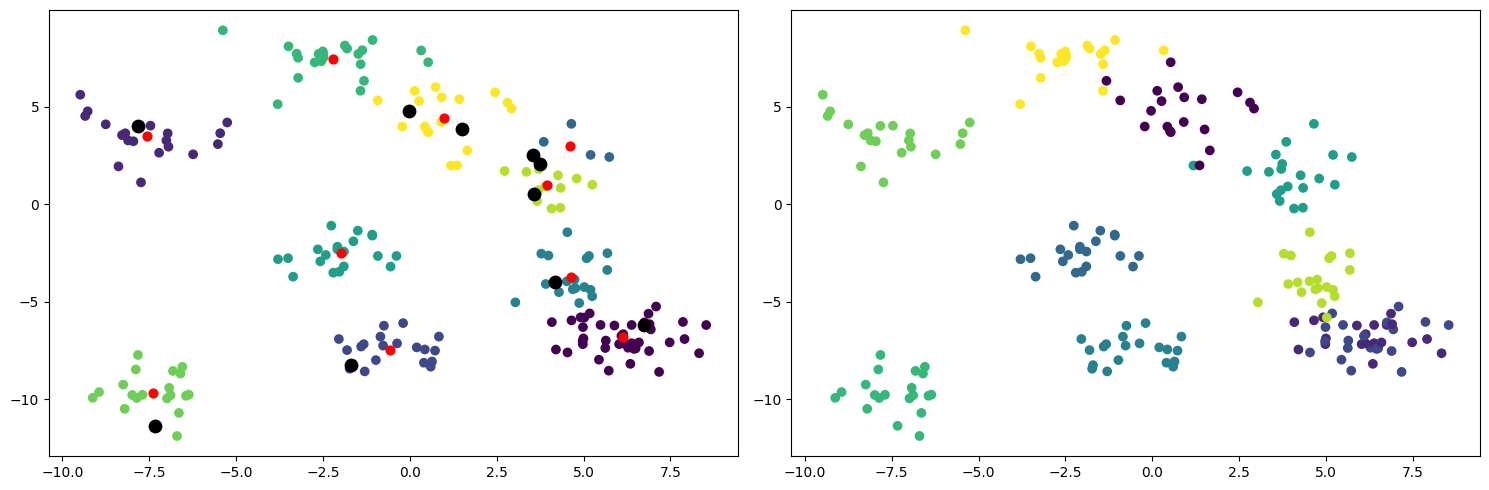

In [62]:
fig = plt.figure(tight_layout=True)
fig.set_figheight(5)
fig.set_figwidth(15)
gs = gridspec.GridSpec(1, 2)
ax = fig.add_subplot(gs[0, 0])
ax.scatter(x3[:, 0], x3[:, 1], c=clastinator3.predict(x3))
ax.scatter(st3[:, 0],
           st3[:, 1], s=80, c='black')
ax.scatter(clastinator3.X_train[:, 0],
           clastinator3.X_train[:, 1], s=40, c='red')
ax = fig.add_subplot(gs[0, 1])
ax.scatter(x3[:,0], x3[:,1], c=y3)